# 딥러닝의 train 원리
 - 딥러닝에서 초기 weight는 랜덤하게 형성된다. 그렇다면 어떻게 훈련이 되기에 이를 모델링 하여 보여주는 것인가?
 - 필수개념 두가지
   - loss function: 모델이 얼마나 잘 예측하는지 측정
   - optimizer: 모델의 weight를 훈련함에 있어 어떤식으로 할 것인지?

# 딥러닝 모델에 우리의 목적에 대한 가이드라인을 설명하는 방법: loss function 
 - 예시: MAE
 - 실제값과 모델이 예측한 값의 차이를 측정

# 딥러닝 모델에서 우리의 문제를 해결하기위한 방법: optimizer
 - loss를 줄이는 방향으로 문제를 해결해나간다.
 - 절차
   - 몇개의 데이터로 훈련 후 예측을 시도
   - 예측한 값에 대한 loss를 산출
   - loss를 줄이는 방향으로 모델의 weight를 수정
  - 위 과정을 내가 원하는 loss가 될 때까지 반복

# Batch size & Epoch
 - Batch size: 딥러닝 모델 훈련 시 몇개의 샘플 데이터로 훈련한다고 말한다. 이 때 몇개를 Batch size라고 말함.
 - 즉 Batch 단위로 weight를 수정하는 방식
 - 모든 데이터에 대해 Batch를 나눈 후 이를 모든 train에 활용했다면, 이는 1 epoch를 진행한 것!

# Learning rate and Batch size
 - 얼마나 weight에 변화를 줄 것인지 결정: Learning rate
 - LR이 작다면, 최적의 모델에 가는 시간이 오래걸릴 것이다. (많은 배치가 필요할 것)
 - Adam은 현존하는 optimizer 중 최고로 불리며 SGD 알고리즘이나 파라미터 튜닝이 없는 self tuning 알고리즘이다
 - 배치사이즈가 작을수록 noise에 영향을 받기 쉬움.
 - 작은 LR은 긴 학습시간을 요구함

# SGD의 의미
 - Stochastic: train에 minibatch는 랜덤하게 선택된다 
 - Gradient: weight가 학습해야할 방향
 - Descent: loss를 줄이는 방향으로

# 코드로 구현

In [12]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

In [24]:
red_wine = pd.read_csv('./data/red-wine.csv')
X = red_wine.copy()
y = X.pop('quality')

# 파이프라인으로 전처리
preprocessor = make_column_transformer(
    (StandardScaler(), # 표준화 스케일링: dtype이 numeric인 것들만
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False), # Onehotencding: dtype이 object인것만
     make_column_selector(dtype_include=object)),
)

'''
pipeline에서 sparse:True면 원 핫 인코딩이 되는 것인가? False면 그냥 1~n까지 값만 부여?
타겟변수는 스케일링 대신 로그를 취한다?
'''

X = preprocessor.fit_transform(X)
y = np.log(y)
input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [11]


In [25]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

In [26]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [27]:
history = model.fit(
    X, y,
    batch_size=256,
    epochs=10,
)

Epoch 1/10
7/7 [==============================] - 0s 3ms/step - loss: 1.1620
Epoch 2/10
7/7 [==============================] - 0s 2ms/step - loss: 0.5559
Epoch 3/10
7/7 [==============================] - 0s 1ms/step - loss: 0.4271
Epoch 4/10
7/7 [==============================] - 0s 997us/step - loss: 0.3842
Epoch 5/10
7/7 [==============================] - 0s 1ms/step - loss: 0.3271
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 0.3033
Epoch 7/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2830
Epoch 8/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2599
Epoch 9/10
7/7 [==============================] - 0s 996us/step - loss: 0.2434
Epoch 10/10
7/7 [==============================] - 0s 1ms/step - loss: 0.2223


##### loss가 계속 줄어들면 train을 계속하는 것이 바람직하나, 어느정도 수렴한다면 끊어주자

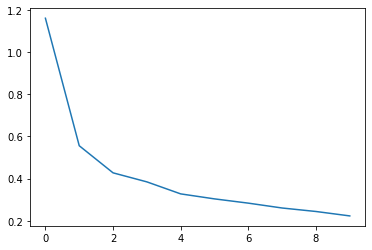

In [28]:
# train의 loss에 대한 값이 저장되어 있음의 loss에 대한 값이 저장되어 있음
history_df = pd.DataFrame(history.history)

# loss를 plot해보기ot해보기
history_df['loss'].plot();

In [29]:
history_df

,loss
0,1.161997
1,0.555950
2,0.427083
3,0.384156
4,0.327050
5,0.303286
6,0.283038
7,0.259932
8,0.243368
9,0.222323
